In [3]:
pip install ucimlrepo 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data 
X = adult.data.features 
y = adult.data.targets 
  
print(adult.metadata) 
  
print(adult.variables)

print("\n Fetching data directly from the dataset. All the variables and attributes of the dataset are listed above.")


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
df = pd.concat([X, y], axis=1)

# Quick cleaning example
df = df.dropna()  # remove rows with missing values
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # remove extra spaces

df.head(10)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:

# Selecting a sensitive attribute 
attr = 'race'

# Combine income (target attribute) and sensitive attribute 
df.groupby(attr)['income'].value_counts(normalize=True)

# Calculate earning of >50K for each race
positive_rates = df[df['income'] == '>50K'][attr].value_counts(normalize=True)

print(positive_rates)


print(" ")
positive_rates = (
    df[df['income'] == '>50K']['race']
    .value_counts(normalize=True)
    .rename('proportion')
    .mul(100)
    .round(2)
)

print("Percentage of High Income By Race")
display(positive_rates)


race
White                 0.907665
Black                 0.049356
Asian-Pac-Islander    0.035200
Amer-Indian-Eskimo    0.004591
Other                 0.003188
Name: proportion, dtype: float64
 
Percentage of High Income By Race


race
White                 90.77
Black                  4.94
Asian-Pac-Islander     3.52
Amer-Indian-Eskimo     0.46
Other                  0.32
Name: proportion, dtype: float64

In [5]:
df['white_num'] = (df['race'] == 'White').astype(int)

df['target_num'] = (df['income'] == '>50K').astype(int)

corr = df['white_num'].corr(df['target_num'])

print(f"Correlation between being White and having income over 50K: {corr:.3f}")



Correlation between being White and having income over 50K: 0.065


In [6]:
#Summary Report: 

print("Percentage of High Income By Race: ")
display(positive_rates)

print("\nCorrelation between being White and having an income over 50K: ")
print(f"{corr:.3f}")


Percentage of High Income By Race: 


race
White                 90.77
Black                  4.94
Asian-Pac-Islander     3.52
Amer-Indian-Eskimo     0.46
Other                  0.32
Name: proportion, dtype: float64


Correlation between being White and having an income over 50K: 
0.065


**Interpretation of the correlation data:** 

The calculation above calculates the correlation between being White and Earning >50k.
The purpose of doing so is to calculate if these two variables (target and sensitive attributes) have any correlation.
The formula above helps us measure if these attributes have a relationship and occur together.
This calculation checks if high values of the race attribute White is often paired with values of high income (>50K).
The correlation coefficient produced: 0.065.
The interpretation of this number is that being White has a small correlation with earning over 50K.
However, White individuals are slightly more likely to earn a high income wage compared to other non-White races.


**Potential Biases In the Dataset**

In [16]:
#Potential Biases in the dataset:
# Show all unique race categories
#df['race'].unique()

# Total in each race category
print("The total count of values for each race")
df['race'].value_counts()

The total count of values for each race


race
White                 40786
Black                  4535
Asian-Pac-Islander     1447
Amer-Indian-Eskimo      460
Other                   393
Name: count, dtype: int64

In [7]:
#Race Percentage Table:
race_counts = df['race'].value_counts()
race_percentages = (race_counts / len(df)) * 100

# Display both
print("The total percentage of each race in the dataset")
display(race_percentages.round(2))

The total percentage of each race in the dataset


race
White                 85.65
Black                  9.52
Asian-Pac-Islander     3.04
Amer-Indian-Eskimo     0.97
Other                  0.83
Name: count, dtype: float64

**Paragraph on potential biases in the dataset:**

Something in the dataset that particularly stood out to me was the imbalance of the race representation. The data above highlights this misrepresentation by showing that 85.65% of teh current data is data derived from White populations. Whereas data from Black populations is comprised of only 9.52% and even less for other minority groups. This creates an obvious disparity in the Adult Income Dataset. 

White individuals make up majority of the enteries whereas Black, Asian Pacific Islanders, Amer-Indian-Eskimo and others are in drastucally smaller numbers. Another key aspect that might result in potential biases is that there no mention of Hispanic, Latino, or Asian Americans. This missing gap and uneven distribution of data might create potential issues as any training data based off this would also be biased. Since this data is primarily focused on a White population, the trained model would also be primaily focused on producing results that focus on a white population, it could lead to unfair and less accuaret predictions from any potential minority groups. 
/.,


In [8]:

from sklearn.model_selection import train_test_split

data = df.copy()

# Create the numeric target: 1 if >50K, 0 otherwise
data['target'] = (data['income'] == '>50K').astype(int)

# Sensitive attribute (for fairness later)
data['white_num'] = (data['race'] == 'White').astype(int)

# Features (drop text income)
X = data.drop(columns=['income', 'target', 'target_num', 'white_num'])

y = data['target'].values
s = data['white_num'].values

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Split into training/testing
X_tr, X_te, y_tr, y_te, s_tr, s_te = train_test_split(
    X, y, s, test_size=0.25, stratify=y, random_state=42
)



In [9]:
# --- Pre-processing: Reweighing (balance group influence) ---


# Combine protected group and label
group_labels = pd.DataFrame({
    "group": s_tr,
    "target": y_tr
})

# Compute counts of each combination
counts = group_labels.value_counts().reset_index(name='count')

# Total counts per sensitive group
group_totals = counts.groupby("group")['count'].transform('sum')

# Desired balance: make P(target|group) uniform
counts['weight'] = group_totals / counts['count']

# Merge weights back
weights = group_labels.merge(counts, on=["group", "target"], how="left")['weight'].values

print("Reweighing done. Mean sample weight =", round(weights.mean(), 3))


Reweighing done. Mean sample weight = 2.0


In [20]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=20000)
logReg.fit(X_tr, y_tr,sample_weight=weights)  # This is the "training" step


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20000)

In [28]:
yhat = logReg.predict(X_te)  # 0/1 predictions on unseen test rows


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", round(accuracy_score(y_te, yhat), 3))
print("Precision:", round(precision_score(y_te, yhat), 3))
print("Recall:", round(recall_score(y_te, yhat), 3))
print("F1:", round(f1_score(y_te, yhat), 3))


Accuracy: 0.754
Precision: 0.384
Recall: 0.82
F1: 0.523


In [30]:
# Demographic Parity difference (how often predicts >50K for each group)
p_white = (yhat[s_te==1]==1).mean()
p_nonwhite = (yhat[s_te==0]==1).mean()
dp_diff = abs(p_white - p_nonwhite)
print(f"Demographic Parity: P(>50K|White)={p_white:.3f}, P(>50K|NonWhite)={p_nonwhite:.3f}, diff={dp_diff:.3f}")



Demographic Parity: P(>50K|White)=0.364, P(>50K|NonWhite)=0.276, diff=0.088


In [31]:
# Equal Opportunity difference (how well it finds true >50K people per group)
tpr_white = ((yhat==1)&(y_te==1)&(s_te==1)).sum() / ((y_te==1)&(s_te==1)).sum()
tpr_nonwhite = ((yhat==1)&(y_te==1)&(s_te==0)).sum() / ((y_te==1)&(s_te==0)).sum()
eo_diff = abs(tpr_white - tpr_nonwhite)
print(f"Equal Opportunity: TPR_White={tpr_white:.3f}, TPR_NonWhite={tpr_nonwhite:.3f}, diff={eo_diff:.3f}")


Equal Opportunity: TPR_White=0.820, TPR_NonWhite=0.827, diff=0.007


In [25]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
import numpy as np

proba = logReg.predict_proba(X_te)[:,1]
brier = brier_score_loss(y_te, proba)

# quick ECE
def expected_calibration_error(y_true, p_pred, n_bins=10):
    bins = np.linspace(0,1,n_bins+1)
    ids = np.digitize(p_pred, bins) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = ids==b
        if not np.any(mask): continue
        acc = y_true[mask].mean()
        conf = p_pred[mask].mean()
        ece += mask.mean() * abs(acc-conf)
    return ece

ece = expected_calibration_error(y_te, proba)
print(f"Brier score = {brier:.4f}, Expected Calibration Error = {ece:.4f}")


Brier score = 0.1592, Expected Calibration Error = 0.2007


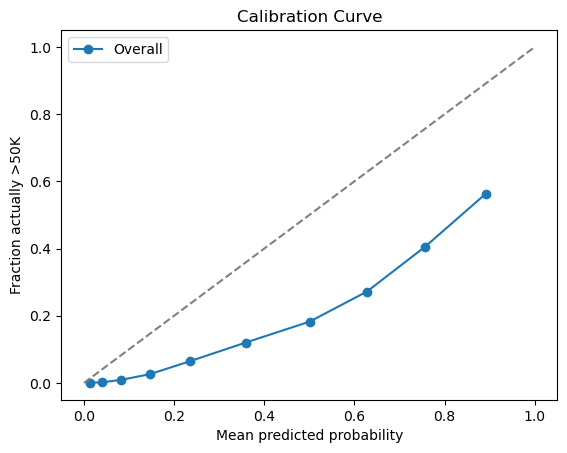

In [32]:
import matplotlib.pyplot as plt
frac_pos, mean_pred = calibration_curve(y_te, proba, n_bins=10, strategy='quantile')
plt.plot(mean_pred, frac_pos, 'o-', label='Overall')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction actually >50K')
plt.title('Calibration Curve')
plt.legend(); plt.show()


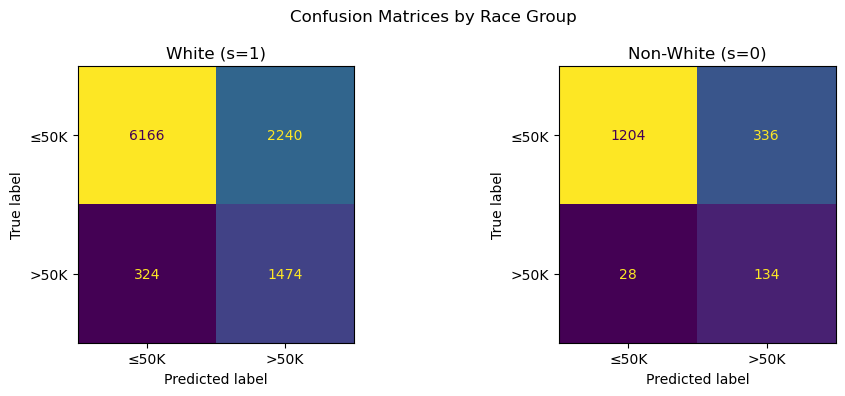

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(10,4))
for ax, group, title in zip(axes, [1,0], ['White (s=1)', 'Non-White (s=0)']):
    cm = confusion_matrix(y_te[s_te==group], yhat[s_te==group], labels=[0,1])
    disp = ConfusionMatrixDisplay(cm, display_labels=['≤50K','>50K'])
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(title)
plt.suptitle('Confusion Matrices by Race Group')
plt.tight_layout()
plt.show()
